## Quantum Illumination Experiment 2

__Find the optimal configurations for PCS state (coherent superpostion of photon subtraction and addition).__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

--- 19898.92664051056 seconds ---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns

# configuration
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
# np.set_printoptions(threshold='nan', precision=6, suppress=True)

plt.style.use(['seaborn-whitegrid', '14pt'])
# plt.style.use(['14pt'])
%matplotlib inline

In [2]:
# df1 = pd.read_csv('../output/data/expr_2/expr_2_pcs_nth_0.1_div_101_03-20.csv', comment='#')
df2 = pd.read_csv('../output/data/expr_2/expr_2_pcs_nth_1_div_51_04-18.csv', comment='#')

In [4]:
# df1.head()

In [5]:
df2.head()

,nmax,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,24,1,0.01,PCS,0.099504,0.079608,0.168732,0.493448,0.499923,0.5,0.039804,0.039804,0.0,0.00
1,24,1,0.01,PCS,0.099504,0.081176,0.168702,0.493441,0.499923,0.5,0.039796,0.041380,0.0,0.02
2,24,1,0.01,PCS,0.099504,0.085873,0.168612,0.493421,0.499922,0.5,0.039773,0.046100,0.0,0.04
3,24,1,0.01,PCS,0.099504,0.093677,0.168463,0.493387,0.499921,0.5,0.039734,0.053943,0.0,0.06
4,24,1,0.01,PCS,0.099504,0.104552,0.168255,0.493341,0.499919,0.5,0.039680,0.064871,0.0,0.08


### Nth = 1.0

In [6]:
for row in df2.iterrows():
    row = row[1]
    if row['Chernoff_Bound'] < 0.499 or row['Chernoff_Bound'] > 0.5:
        print(row['ra'], row['rb'], row['Chernoff_Bound'])

In [7]:
size = 51
hb2 = df2['Helstrom_Bound'].values.reshape(size, size)
cb2 = df2['Chernoff_Bound'].values.reshape(size, size)
n2 = df2['Aver_N'].values.reshape(size, size)
vn2 = df2['VN_Entropy'].values.reshape(size, size)
na2 = df2['A_aver_N'].values.reshape(size, size)
nb2 = df2['B_aver_N'].values.reshape(size, size)

In [8]:
X2 = df2['ra'].values.reshape(size, size)
Y2 = df2['rb'].values.reshape(size, size)

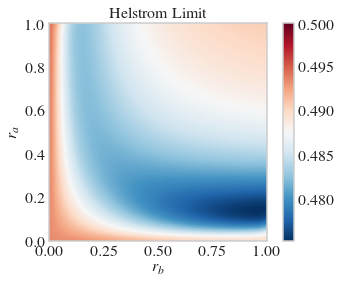

In [9]:
plt.imshow(hb2, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1.0, 0.0, 1.0])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Helstrom Limit')
# plt.savefig('../output/figures/g_pcs_qhb_1.pdf', bbox_inches='tight')

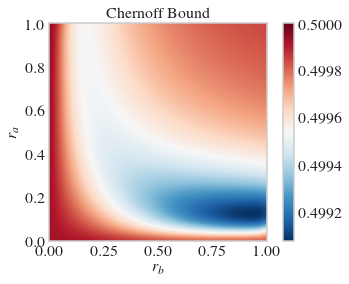

In [10]:
plt.imshow(cb2, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Chernoff Bound')
plt.savefig('../output/figures/g_pcs_qcb.pdf', bbox_inches='tight')

In [11]:
# fig = plt.contour(Y2, X2, cb2, levels=np.arange(0.499, 0.5, 0.0001))
# # plt.clabel(fig, fontsize=10)
# plt.colorbar()
# plt.axes().set_aspect('equal')
# plt.xlabel('$r_b$')
# plt.ylabel('$r_a$')
# plt.grid(False)
# plt.title('Chernoff Bound')
# plt.savefig('../output/figures/g_pcs_qcb.pdf', bbox_inches='tight')

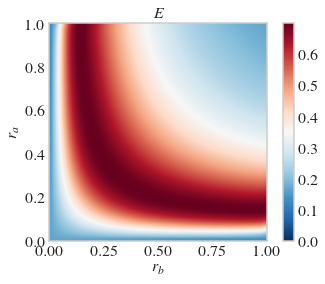

In [12]:
plt.imshow(vn2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('$E$')
plt.savefig('../output/figures/g_pcs_vn.pdf', bbox_inches='tight')

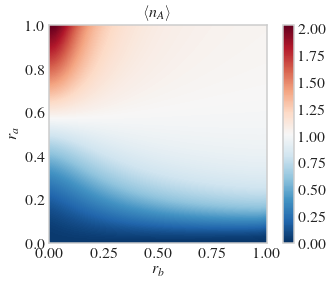

In [14]:
plt.imshow(na2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('$\langle n_A \\rangle$')
plt.savefig('../output/figures/g_pcs_na.pdf', bbox_inches='tight')

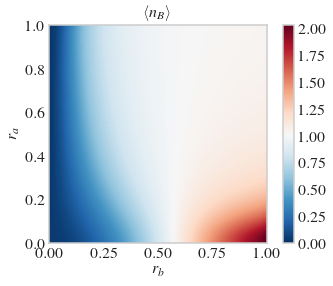

In [15]:
plt.imshow(nb2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('$\langle n_B \\rangle$')
plt.savefig('../output/figures/g_pcs_nb.pdf', bbox_inches='tight')

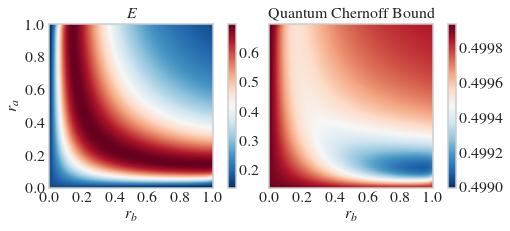

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
im1 = ax1.imshow(vn2, cmap='RdBu_r', interpolation='Bilinear', 
                 origin='lower', extent=[0, 1, 0, 1])
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set(adjustable='box-forced', aspect='equal')
ax1.set_xlabel('$r_b$')
ax1.set_ylabel('$r_a$')
ax1.set_title('$E$')
ax1.grid(False)
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(cb2, vmin=0.4990, cmap='RdBu_r', interpolation='Bilinear', 
                 origin='lower', extent=[0, 1, 0, 1])
ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set(adjustable='box-forced', aspect='equal')
ax2.set_xlabel('$r_b$')
# ax2.set_ylabel('$r_a$')
ax2.set_title('Quantum Chernoff Bound')
ax2.grid(False)
fig.colorbar(im2, ax=ax2)

plt.tight_layout(pad=0.0, w_pad=-8.0, h_pad=-0.5)

plt.savefig('../output/figures/g_pcs_etgl_qcb.pdf', bbox_inches='tight')
plt.savefig('../output/figures/g_pcs_etgl_qcb.png', bbox_inches='tight')

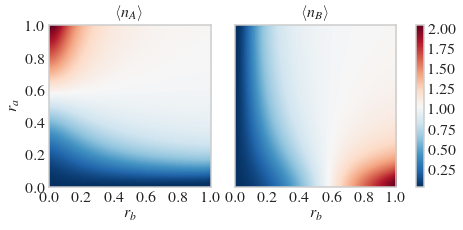

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
im1 = ax1.imshow(na2, cmap='RdBu_r', interpolation='Bilinear', 
                 origin='lower', extent=[0, 1, 0, 1])
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set(adjustable='box-forced', aspect='equal')
ax1.set_xlabel('$r_b$')
ax1.set_ylabel('$r_a$')
ax1.set_title('$\langle n_A \\rangle$')
ax1.grid(False)
# fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(nb2, cmap='RdBu_r', interpolation='Bilinear', 
                 origin='lower', extent=[0, 1, 0, 1])
ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set(adjustable='box-forced', aspect='equal')
ax2.set_xlabel('$r_b$')
# ax2.set_ylabel('$r_a$')
ax2.set_title('$\langle n_B \\rangle$')
ax2.grid(False)
fig.colorbar(im2, ax=ax2)

plt.tight_layout(pad=0.0, w_pad=-25.0, h_pad=-0.5)

plt.savefig('../output/figures/g_pcs_na_nb.pdf', bbox_inches='tight')
plt.savefig('../output/figures/g_pcs_na_nb.png', bbox_inches='tight')